In [446]:
#Import required packages
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Data Import

In [447]:
#Import CSV file as dataframe
data_df = pd.read_csv("canine_cushings_disease_clean.csv")

#Set PatientID as index
data_df.index = data_df['PatientID']

#Remove PatientID column
del data_df['PatientID']

#Check df
data_df.head()

,Diagnosis,Breed,Age,Sex,Neutered,WeightChange,Weight,Hospitalised,HeartRate,Temperature,...,Polydipsia,Polyuria,IncreasedALKP,IncreasedATL/GGT/AST,LowUSG,Proteinuria,Hypertensive,LowBloodSugar,Hypothyroid,CruciateSurgery
PatientID,,,,,,,,,,,,,,,,,,,,,
1,1,Jack Russell Terrier,12,M,True,No change,13.00,False,NaN,NaN,...,True,True,True,True,NaN,True,False,False,False,False
2,1,Bichon Frise,12,F,True,No change,9.30,False,NaN,39.2,...,True,True,True,True,True,True,False,False,False,False
3,1,West Highland White Terrier,13,F,True,No change,9.82,False,NaN,NaN,...,True,True,True,True,False,True,False,False,False,False
4,1,Cocker Spaniel,12,F,True,No change,11.30,True,120.0,39.2,...,True,True,NaN,NaN,NaN,NaN,False,False,False,False
5,1,Crossbreed,9,F,False,No change,9.30,False,96.0,37.4,...,True,True,True,True,True,True,False,False,False,False


### Data Cleaning

In [448]:
#Check data types
data_df.dtypes

Diagnosis                  int64
Breed                     object
Age                        int64
Sex                       object
Neutered                    bool
WeightChange              object
Weight                   float64
Hospitalised                bool
HeartRate                float64
Temperature              float64
Vomiting                    bool
Diarrhoea                   bool
Hepatomegaly                bool
ThinDrySkin                 bool
Alopecia                    bool
Pruritus                    bool
MuscleWastageWeakness       bool
Lethargy                    bool
Panting                     bool
Neurological                bool
Polydipsia                  bool
Polyuria                    bool
IncreasedALKP             object
IncreasedATL/GGT/AST      object
LowUSG                    object
Proteinuria               object
Hypertensive                bool
LowBloodSugar               bool
Hypothyroid                 bool
CruciateSurgery             bool
dtype: obj

### Imputing NA values

In [449]:
#Observe heart rate data statistics
data_df['HeartRate'].describe()

count    415.000000
mean     113.674699
std       22.793713
min       48.000000
25%      100.000000
50%      120.000000
75%      124.000000
max      192.000000
Name: HeartRate, dtype: float64

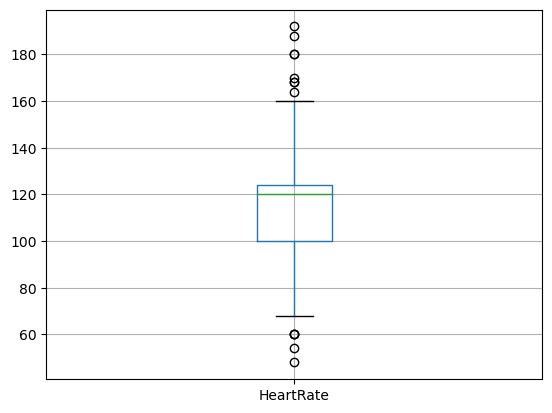

In [450]:
data_df.boxplot(column='HeartRate')
plt.show()

In [451]:
#Impute mean into heartrate NA values
heartrate_mean = data_df['HeartRate'].mean()
heartrate_mean

113.67469879518072

In [452]:
#Append mean to NA values
data_df['HeartRate'] = data_df['HeartRate'].replace(np.nan, heartrate_mean)

#Check NA value count
data_df['HeartRate'].isna().sum()

0

### Scaling Feature Values

In [453]:
#Create list of numerical column names
num_columns = ['Age', 'Weight', 'HeartRate', 'Temperature']

#Standard Scale the numerical values
scaled_num_cols = StandardScaler().fit_transform(data_df[num_columns])

#Check scaled data
scaled_num_cols

array([[ 0.70799614, -0.32233216,  0.        ,         nan],
       [ 0.70799614, -0.64873217,  0.        ,  0.05080579],
       [ 1.05526421, -0.60285974,  0.        ,         nan],
       ...,
       [ 0.70799614,  0.55983001,  0.        ,         nan],
       [ 1.74980035, -0.63991055,  0.        ,         nan],
       [ 1.40253228,  0.07464082,  0.        ,         nan]])

In [454]:
#Create df of scaled numerical data
scaled_num_cols_df = pd.DataFrame(scaled_num_cols, columns=num_columns)

#Add the PatientID column as the df index
scaled_num_cols_df.index = data_df.index

#Check df
scaled_num_cols_df.head()

,Age,Weight,HeartRate,Temperature
PatientID,,,,
1,0.707996,-0.322332,0.000000,NaN
2,0.707996,-0.648732,0.000000,0.050806
3,1.055264,-0.602860,0.000000,NaN
4,0.707996,-0.472300,0.464710,0.050806
5,-0.333808,-0.648732,-1.298533,-0.223786


In [455]:
#Create df of boolean data
bool_df = data_df.select_dtypes(include='bool')
bool_df['IncreasedALKP'] = data_df['IncreasedALKP']
bool_df['IncreasedATL/GGT/AST'] = data_df['IncreasedATL/GGT/AST']
bool_df['LowUSG'] = data_df['LowUSG']
bool_df['Proteinuria'] = data_df['Proteinuria']
bool_df['Diagnosis'] = data_df['Diagnosis']

bool_df.head()

,Neutered,Hospitalised,Vomiting,Diarrhoea,Hepatomegaly,ThinDrySkin,Alopecia,Pruritus,MuscleWastageWeakness,Lethargy,...,Polyuria,Hypertensive,LowBloodSugar,Hypothyroid,CruciateSurgery,IncreasedALKP,IncreasedATL/GGT/AST,LowUSG,Proteinuria,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
1,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,True,NaN,True,1
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,True,1
3,True,False,False,False,True,True,False,False,False,False,...,True,False,False,False,False,True,True,False,True,1
4,True,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,NaN,NaN,NaN,NaN,1
5,False,False,False,True,True,False,False,False,False,True,...,True,False,False,False,False,True,True,True,True,1


In [456]:
#Encode all boolean variables with 1 = True, 0 = False
bool_df = bool_df.replace({True: 1, False: 0})

#Check data types
bool_df.dtypes


Neutered                   int64
Hospitalised               int64
Vomiting                   int64
Diarrhoea                  int64
Hepatomegaly               int64
ThinDrySkin                int64
Alopecia                   int64
Pruritus                   int64
MuscleWastageWeakness      int64
Lethargy                   int64
Panting                    int64
Neurological               int64
Polydipsia                 int64
Polyuria                   int64
Hypertensive               int64
LowBloodSugar              int64
Hypothyroid                int64
CruciateSurgery            int64
IncreasedALKP            float64
IncreasedATL/GGT/AST     float64
LowUSG                   float64
Proteinuria              float64
Diagnosis                  int64
dtype: object

In [457]:
#Change float data types to integers
bool_df['IncreasedALKP'] = bool_df['IncreasedALKP'].astype('Int64')
bool_df['IncreasedATL/GGT/AST'] = bool_df['IncreasedATL/GGT/AST'].astype('Int64')
bool_df['LowUSG'] = bool_df['LowUSG'].astype('Int64')
bool_df['Proteinuria'] = bool_df['Proteinuria'].astype('Int64')

#Check data types
bool_df.dtypes

Neutered                 int64
Hospitalised             int64
Vomiting                 int64
Diarrhoea                int64
Hepatomegaly             int64
ThinDrySkin              int64
Alopecia                 int64
Pruritus                 int64
MuscleWastageWeakness    int64
Lethargy                 int64
Panting                  int64
Neurological             int64
Polydipsia               int64
Polyuria                 int64
Hypertensive             int64
LowBloodSugar            int64
Hypothyroid              int64
CruciateSurgery          int64
IncreasedALKP            Int64
IncreasedATL/GGT/AST     Int64
LowUSG                   Int64
Proteinuria              Int64
Diagnosis                int64
dtype: object

In [458]:
#Create df of object variables
object_df = data_df[['Breed', 'Sex', 'WeightChange']]

#Check df
object_df.head()

,Breed,Sex,WeightChange
PatientID,,,
1,Jack Russell Terrier,M,No change
2,Bichon Frise,F,No change
3,West Highland White Terrier,F,No change
4,Cocker Spaniel,F,No change
5,Crossbreed,F,No change


In [459]:
#Get dummies for sex
sex_df = pd.get_dummies(object_df['Sex'])

#Check df
sex_df.head()

,F,M
PatientID,,
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0


In [460]:
#Get dummies for WeightChange
weightchange_df = pd.get_dummies(object_df['WeightChange'])

#Check df
weightchange_df.head()

,No change,Weight gain,Weight loss
PatientID,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [461]:
#Get dummies for breed
breed_df = pd.get_dummies(object_df['Breed'])

breed_df.head()

,Aberdeen Terrier,Airedale Terrier,Akita Inu,Basset Griffon Vendeen Grand,Basset Hound,Beagle,Bedlington Terrier,Bichon Frise,Border Terrier,Boston Terrier,...,Sussex Spaniel,Tibetan Spaniel,Tibetan Terrier,Weimeraner,Welsh Terrier,West Highland Terrier,West Highland White Terrier,Wheaten Terrier,Whippet,Yorkshire Terrier
PatientID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
#Concatonate all scaled dataframes
scaled_df = pd.concat([scaled_num_cols_df, sex_df, weightchange_df, breed_df, bool_df], axis=1)

#Check df
scaled_df.head()

,Age,Weight,HeartRate,Temperature,F,M,No change,Weight gain,Weight loss,Aberdeen Terrier,...,Polyuria,Hypertensive,LowBloodSugar,Hypothyroid,CruciateSurgery,IncreasedALKP,IncreasedATL/GGT/AST,LowUSG,Proteinuria,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
1,0.707996,-0.322332,0.000000,NaN,0,1,1,0,0,0,...,1,0,0,0,0,1,1,<NA>,1,1
2,0.707996,-0.648732,0.000000,0.050806,1,0,1,0,0,0,...,1,0,0,0,0,1,1,1,1,1
3,1.055264,-0.602860,0.000000,NaN,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
4,0.707996,-0.472300,0.464710,0.050806,1,0,1,0,0,0,...,1,0,0,0,0,<NA>,<NA>,<NA>,<NA>,1
5,-0.333808,-0.648732,-1.298533,-0.223786,1,0,1,0,0,0,...,1,0,0,0,0,1,1,1,1,1


### Drop NA Values

In [463]:
#NAN summary
scaled_df.isna().sum().sort_values(ascending=False).head(10)

Temperature             819
Proteinuria             745
LowUSG                  706
IncreasedATL/GGT/AST    598
IncreasedALKP           504
Weight                  127
Sealyham Terrier          0
Saluki                    0
Samoyed                   0
Schnauzer                 0
dtype: int64

In [464]:
#Removal of rows with > 50% NAN
del scaled_df['IncreasedALKP']
del scaled_df['IncreasedATL/GGT/AST']
del scaled_df['LowUSG']
del scaled_df['Proteinuria']

#Check df
scaled_df.head()

,Age,Weight,HeartRate,Temperature,F,M,No change,Weight gain,Weight loss,Aberdeen Terrier,...,Lethargy,Panting,Neurological,Polydipsia,Polyuria,Hypertensive,LowBloodSugar,Hypothyroid,CruciateSurgery,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
1,0.707996,-0.322332,0.000000,NaN,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0.707996,-0.648732,0.000000,0.050806,1,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
3,1.055264,-0.602860,0.000000,NaN,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,0.707996,-0.472300,0.464710,0.050806,1,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
5,-0.333808,-0.648732,-1.298533,-0.223786,1,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [465]:
#Remove rows with na values
scaled_df = scaled_df.dropna(axis=0)

#Check df
scaled_df.isna().sum().sort_values()

Age                              0
Siberian Husky                   0
Shih Tzu                         0
Shar Pei                         0
Sealyham Terrier                 0
                                ..
Collie                           0
Cocker Spaniel                   0
Chihuahua                        0
Cavalier King Charles Spaniel    0
Diagnosis                        0
Length: 115, dtype: int64

In [466]:
#Check df
scaled_df.isna().sum().sort_values(ascending=False)

Age                 0
Sussex Spaniel      0
Springer Spaniel    0
Siberian Husky      0
Shih Tzu            0
                   ..
Crossbreed          0
Corgi               0
Collie              0
Cocker Spaniel      0
Diagnosis           0
Length: 115, dtype: int64

In [467]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 2 to 1148
Columns: 115 entries, Age to Diagnosis
dtypes: float64(4), int64(19), uint8(92)
memory usage: 80.7 KB


### Prepare the data

In [468]:
#Save the dependent variable into a single-column array
Y = scaled_df.iloc[:, -1:]

#Check df
Y[0:5]

,Diagnosis
PatientID,
2,1
4,1
5,1
13,1
14,1


In [469]:
#Save the independent variables
X = scaled_df.iloc[:, :-1]

#Check df
X.head()

,Age,Weight,HeartRate,Temperature,F,M,No change,Weight gain,Weight loss,Aberdeen Terrier,...,MuscleWastageWeakness,Lethargy,Panting,Neurological,Polydipsia,Polyuria,Hypertensive,LowBloodSugar,Hypothyroid,CruciateSurgery
PatientID,,,,,,,,,,,,,,,,,,,,,
2,0.707996,-0.648732,0.000000,0.050806,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
4,0.707996,-0.472300,0.464710,0.050806,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
5,-0.333808,-0.648732,-1.298533,-0.223786,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
13,1.055264,-0.384084,-1.004659,0.050806,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
14,-1.028344,-0.516408,0.464710,-0.010215,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [470]:
#Split the data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y, test_size=0.2)

### Initiate and Train the Model

In [471]:
#Initiate model limited to 200 iterations
LR_model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

#Fit training data to the model
LR_model.fit(X_train, Y_train)

#Print the training and test scores for the model
training_score = LR_model.score(X_train, Y_train)
test_score = LR_model.score(X_test, Y_test)

print(f"Training Data Score: {training_score}")
print(f"Test Data Score: {test_score}")

Training Data Score: 0.8275862068965517
Test Data Score: 0.7966101694915254


c:\Users\kalio\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [472]:
#Predict the test values
test_predictions = LR_model.predict(X_test)

#Create df of predicted vs. actual test values
predict_dict = {'Prediction': test_predictions, 'Actual': Y_test["Diagnosis"]}
predict_df = pd.DataFrame(predict_dict)

#Check df
predict_df.head()

,Prediction,Actual
PatientID,,
929,0,0
862,0,0
789,0,0
846,0,0
732,0,0


In [473]:
#Calculate prediction accuracy scores
accuracy_score(Y_test['Diagnosis'], test_predictions)

0.7966101694915254

In [474]:
# Specify the file path to save the model
model_filename = 'trained_model.pkl'

# Open the file in binary write mode and save the model
with open(model_filename, 'wb') as file:
    pickle.dump(LR_model, file)

In [475]:
#Produce Classification report
target_names = ['No Disease (0)', 'Disease (1)']
print("Classification Report:")
print(classification_report(Y_test, test_predictions, target_names=target_names))

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.78      0.88      0.82        32
   Disease (1)       0.83      0.70      0.76        27

      accuracy                           0.80        59
     macro avg       0.80      0.79      0.79        59
  weighted avg       0.80      0.80      0.79        59

